## Parte 1

Crea una función como la del ejercicio 2 en la que se pase como input: 
- un vector 'x' con la variable independiente; 
- un parámetro 'a';
- un parámetro 'b' 
- un valor 'sigma'; 

que devuelva un vector 'y' que esté distribuido como una función normal con media: 

$\bar{y} = ax + b$

y $\sigma$ = 'sigma'. 

In [2]:
get.y <- function(x, angular.coeff, intercept, std.dev){
    my.output <- c()
    for (values in x){
    my.output <- c(my.output, rnorm(1, (angular.coeff*values + b), std.dev))
    }
    return(my.output)
}

## Parte 2

Construye una función que reciba dos vectores 'x' e 'y' supuestamente relacionados linealmente y calcule los valores de 'a' y 'b' que minimizan la función de coste. 

In [3]:
#library(matlib)

# alpha = (XT X)-1 XT Y
# X = matriz con N lineas y M columnas
# N = número de observaciones
# M = número de 'features'

get.aplha <- function(mat.x, vec.y){
    ones <- rep(c(1),nrow(mat.x))
    mat.x <- cbind(ones,mat.x)
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    alpha <- all.x %*% vec.y
    return(alpha)
}

## Parte 3

Genera un vector 'x' aleatorio con valores entre 0 y 8, y N = 100 puntos. 

Usa la función creada en 1 con valores:
- a = 1; 
- b = 2; 
- $\sigma$ = 2;

y la función creada en 2 para encontrar el mínimo de la función de coste. 

Pinta en un mismo plot 'x' e 'y' representados con puntos, y la recta 

$ y = ax + b$

In [4]:
# Definición de los paramtetros
a <- 1
b <- 2
sigma <- 2

N = 100

In [5]:
# Genero los puntos
my.x <- matrix(runif(N,0,8),ncol=1)

# x, angular.coeff, intercept, std.dev)
my.y <- get.y(my.x, a, b, sigma)

print(nrow(my.x))

[1] 100


In [6]:
# Saco los valores de los parametros de la recta que mnimiza la función de coste
my.alpha <- get.aplha(my.x, my.y)
my.alpha

ones,1.9265686
,0.9304934


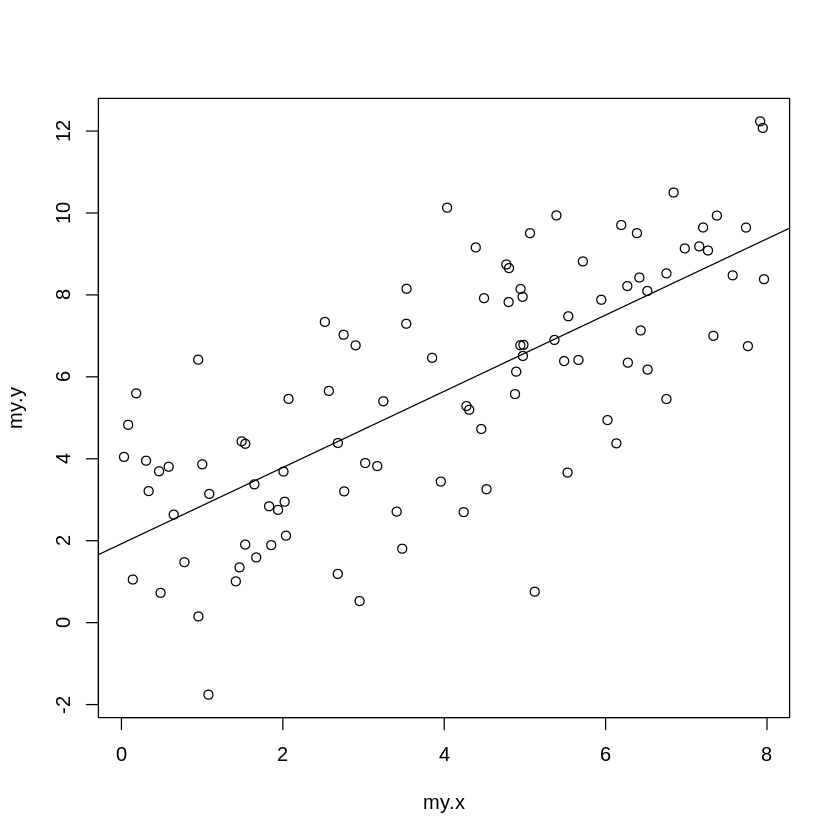

In [7]:
plot(my.x,my.y)
abline(my.alpha[1],my.alpha[2])

## Parte 4

Construye una función que calcule la matriz de covarianza asociada al ajuste lineal anterior. 

Utilízala con los vectores 'x' e 'y' anteriores y calcula dicha matriz para ese caso particular.

In [ ]:
get.cov.alpha <- function(vec.x, vec.y){
    ones <- rep(c(1),nrow(vec.x))
    mat.x <- cbind(ones,vec.x)
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    cov.y <- diag(x = var(my.y), nrow = length(vec.y), ncol = length(vec.y), names = F)
    cov.alpha <- all.x %*% cov.y %*% t(all.x)
    return(cov.alpha)
}

In [74]:
my.cov.alpha <- get.cov.alpha(my.x,my.y)
my.cov.alpha

,ones,
ones,"0,35044751","-0,06567861"
,"-0,06567861","0,01646382"


## Parte 5

Crea una función como la del apartado 1 donde se añadan 3 parámetros más (c, d, e) y en dónde todo sea igual salvo que 

$y = a + bx + cx^2 + dx^3 + ex^4$

In [31]:
get.pol.4 <- function(x, a, b, c, d, e, std.dev){
    my.output <- c()
    for (values in x){
    my.output <- c(my.output, rnorm(1, (a + b*values + c*values**2 + d*values**3 + e*values**4), std.dev))
    }
    return(my.output)
}

## Parte 6

Repite (3) y (4) con la función generada en (5) y usando: 
- a = 107; 
- b = -176: 
- c = 86;
- d = -16;
- e = 1.

In [38]:
# Definición de los paramtetros
coeff.0 <- 107
coeff.1 <- -176
coeff.2 <- 86
coeff.3 <- -16
coeff.4 = 1
sigma <- 2

N = 100

In [ ]:
# Genero los puntos
my.new.x <- matrix(runif(N,0,8),ncol=1)

# x, a, b, c, d, e, std.dev
my.pol.4 <- get.pol.4(my.new.x, coeff.0, coeff.1, coeff.2, coeff.3, coeff.4, sigma)

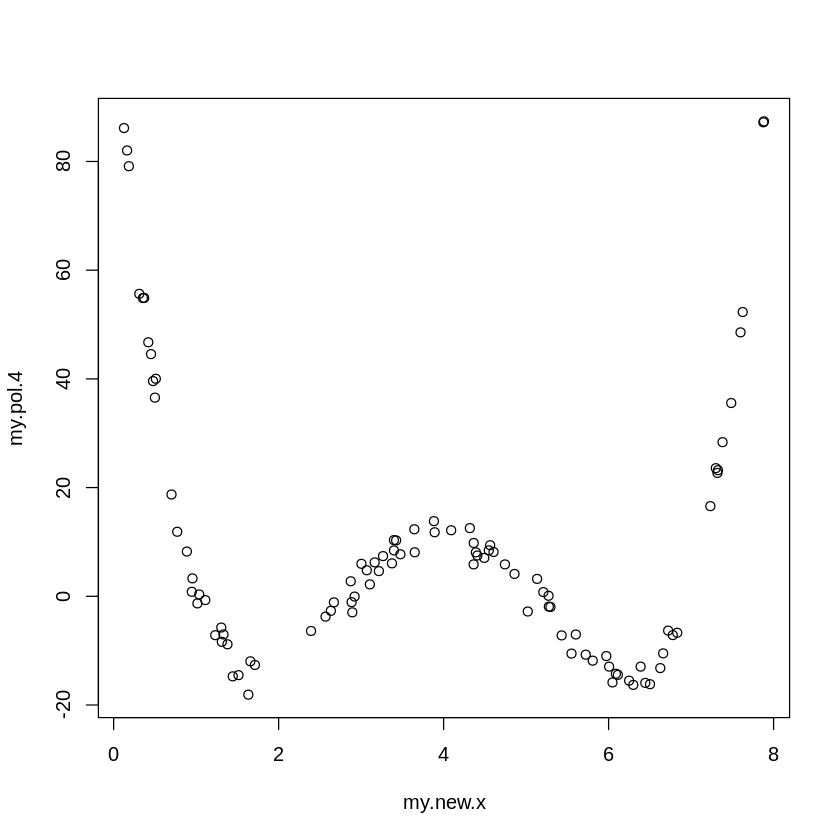

In [40]:
plot(my.new.x, my.pol.4)

In [52]:
# función para ajuste polinomial generico (hay que especificar el grado del polinomio)
get.generic.aplha <- function(vec.x, vec.y, grade){
    ones <- rep(c(1),nrow(vec.x))
    mat.x <- cbind(ones,vec.x)
    for(i in 2:grade){
        mat.x <- cbind(mat.x,vec.x**i)
    }
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    alpha <- all.x %*% vec.y
    return(alpha)
}

In [54]:
my.alpha.4 <- get.generic.aplha(my.new.x, my.pol.4, 4)
my.alpha.4

ones,"107,068867"
,"-177,253389"
,"87,129811"
,"-16,271962"
,"1,019113"


In [58]:
get.generic.cov.alpha <- function(vec.x, vec.y, grade){
    ones <- rep(c(1),nrow(vec.x))
    mat.x <- cbind(ones,vec.x)
    for(i in 2:grade){
        mat.x <- cbind(mat.x,vec.x**i)
    }
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    cov.y <- diag(x = var(my.y), nrow = length(vec.y), ncol = length(vec.y), names = F)
    cov.alpha <- all.x %*% cov.y %*% t(all.x)
    return(cov.alpha)
}

In [69]:
get.generic.cov.alpha(my.new.x, my.pol.4, 4)

,ones,,,,
ones,"2,16984875","-3,59151117","1,62715290","-0,276349290","0,0157514209"
,"-3,59151117","7,50467174","-3,70761238","0,659950373","-0,0387586282"
,"1,62715290","-3,70761238","1,93183528","-0,356476429","0,0214866465"
,"-0,27634929","0,65995037","-0,35647643","0,067565008","-0,0041564857"
,"0,01575142","-0,03875863","0,02148665","-0,004156486","0,0002598663"


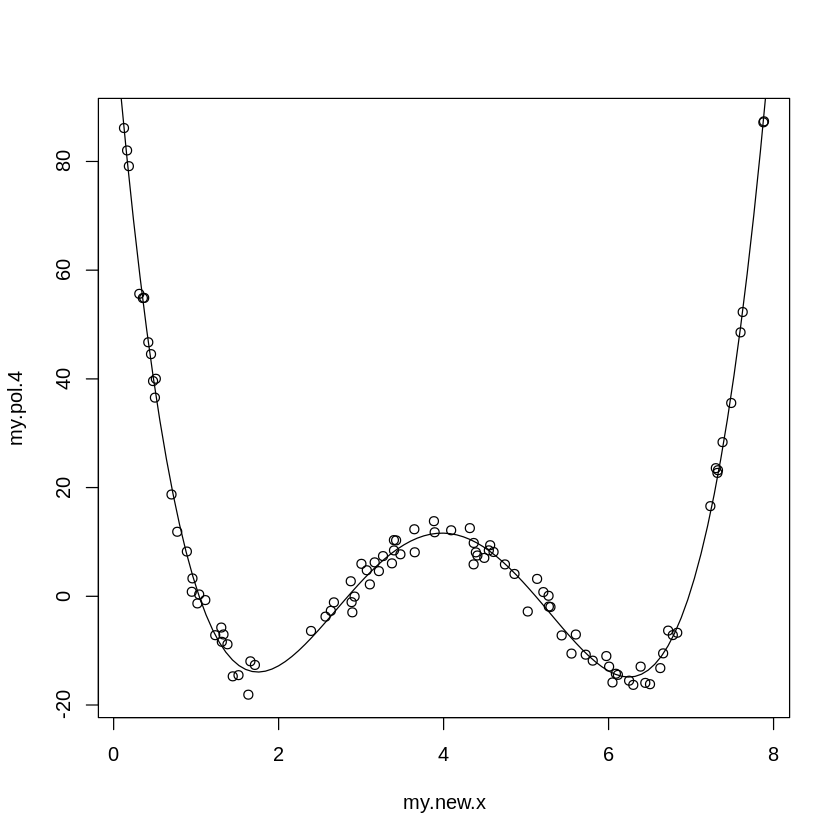

In [68]:
plot(my.new.x,my.pol.4)
curve(my.alpha.4[1] 
      + my.alpha.4[2]*x 
      + my.alpha.4[3]*x**2 
      + my.alpha.4[4]*x**3 
      + my.alpha.4[5]*x**4, 
      from = 0, to = 8, add=TRUE)